## Gather

In [1]:
#Import all packages needed
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import json

In [2]:
#pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [3]:
import pandas as pd 
df = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Use requests library to download tsv file from a website
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

# Read in tsv file as a Pandas DataFrame    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')


In [5]:
CONSUMER_KEY = "key"
CONSUMER_SECRET = "secret
BEARER_TOKEN = 'toke'
OAUTH_TOKEN = "otoken"
OAUTH_TOKEN_SECRET = "tokenSecret"
# twitter = Twython(
#     CONSUMER_KEY, CONSUMER_SECRET,
#     OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

# tweet = twitter.show_status(id=id_of_tweet)
# print(tweet['text'])

auth = tweepy.OAuthHandler(CONSUMER_KEY,CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

#Download Tweepy status object based on Tweet ID and store in list
list_of_tweets = []
# Tweets that can't be found are saved in the list below:
cant_find_tweets_for_those_ids = []
for tweet_id in df['tweet_id']:   
    try:
        list_of_tweets.append(api.get_status(tweet_id))
    except Exception as e:
        cant_find_tweets_for_those_ids.append(tweet_id)

Rate limit reached. Sleeping for: 276
Rate limit reached. Sleeping for: 303


In [6]:
print("The list of tweets" ,len(list_of_tweets))
print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

The list of tweets 2331
The list of tweets no found 25


In [7]:
#we write this list into a txt file:

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_tweets, indent=4))

In [8]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
tweets_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        tweets_list.append({'id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                            'text': text
                            })
        tweet_json = pd.DataFrame(tweets_list, columns = ['id', 'favorite_count','retweet_count'])

## Assess

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [16]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [23]:
print(df.expanded_urls.isnull().sum())

59


In [68]:
print(df.retweeted_status_user_id.unique())
print(df.retweeted_status_user_id.isna().sum())

[           nan 4.19698384e+09 1.96074000e+07 5.12804507e+08
 1.54767397e+08 7.87461778e+17 3.63890752e+08 5.87097230e+07
 6.66990130e+07 7.47554344e+17 3.41021133e+08 5.97064155e+08
 4.11984180e+07 8.11740824e+08 7.26634734e+08 7.12457247e+17
 4.46675020e+07 4.87197737e+08 2.48855660e+07 7.99237010e+07
 1.22832566e+09 1.73272909e+09 1.95036846e+08 2.80479778e+08
 7.83214000e+05 4.29683174e+09]
2175


In [38]:
#prove that some ratings were taking wrongly caused by decimal points
with pd.option_context('max_colwidth', 500):
    display(df[df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['text', 'rating_numerator', 'rating_denominator']])

/home/nour/anaconda3/lib/python3.8/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [89]:
df[df['name'].str.len() < 3]['name'].value_counts()


a     55
Bo     9
an     7
by     1
O      1
JD     1
Jo     1
Al     1
my     1
Mo     1
Ed     1
Name: name, dtype: int64

In [44]:
# checking the unique values of doggo, floofer, pupper and puppo column
print(df['doggo'].unique(), df['floofer'].unique(), df['pupper'].unique(), df['puppo'].unique())

['None' 'doggo'] ['None' 'floofer'] ['None' 'pupper'] ['None' 'puppo']


In [50]:
df.loc[(df['doggo']== 'None') & (df['floofer']== 'None') & (df['pupper']== 'None') & (df['puppo']== 'None')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [53]:
with pd.option_context('max_colwidth', 500):
    display(df.loc[(df['doggo']== 'doggo') & (df['floofer']== 'floofer')])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1",11,10,None,doggo,floofer,None,None


In [54]:
with pd.option_context('max_colwidth', 500):
    display(df.loc[(df['doggo']== 'doggo') & (df['pupper']== 'pupper')])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
460,817777686764523521,NaN,NaN,2017-01-07 16:59:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Dido. She's playing the lead role in ""Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple."" 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7",NaN,NaN,NaN,https://twitter.com/dog_rates/status/817777686764523521/video/1,13,10,Dido,doggo,None,pupper,None
531,808106460588765185,NaN,NaN,2016-12-12 00:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808106460588765185/photo/1,12,10,None,doggo,None,pupper,None
565,802265048156610565,7.331095e+17,4.196984e+09,2016-11-25 21:37:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze",NaN,NaN,NaN,https://twitter.com/dog_rates/status/802265048156610565/photo/1,11,10,None,doggo,None,pupper,None
575,801115127852503040,NaN,NaN,2016-11-22 17:28:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/801115127852503040/photo/1,https://twitter.com/dog_rates/status/801115127852503040/photo/1",12,10,Bones,doggo,None,pupper,None
705,785639753186217984,NaN,NaN,2016-10-11 00:34:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/785639753186217984/photo/1,https://twitter.com/dog_rates/status/785639753186217984/photo/1",10,10,Pinot,doggo,None,pupper,None
733,781308096455073793,NaN,NaN,2016-09-29 01:42:20 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","Pupper butt 1, Doggo 0. Both 12/10 https://t.co/WQvcPEpH2u",NaN,NaN,NaN,https://vine.co/v/5rgu2Law2ut,12,10,None,doggo,None,pupper,None
778,775898661951791106,NaN,NaN,2016-09-14 03:27:11 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: Like father (doggo), like son (pupper). Both 12/10 https://t.co/pG2inLaOda",7.331095e+17,4.196984e+09,2016-05-19 01:38:16 +0000,"https://twitter.com/dog_rates/status/733109485275860992/photo/1,https://twitter.com/dog_rates/status/733109485275860992/photo/1",12,10,None,doggo,None,pupper,None
822,770093767776997377,NaN,NaN,2016-08-29 03:00:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is just downright precious af. 12/10 for both pupper and doggo https://t.co/o5J479bZUC,7.410673e+17,4.196984e+09,2016-06-10 00:39:48 +0000,"https://twitter.com/dog_rates/status/741067306818797568/photo/1,https://twitter.com/dog_rates/status/741067306818797568/photo/1",12,10,just,doggo,None,pupper,None
889,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Maggie &amp; Lila. Maggie is the doggo, Lila is the pupper. They are sisters. Both 12/10 would pet at the same time https://t.co/MYwR4DQKll",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/759793422261743616/photo/1,https://twitter.com/dog_rates/status/759793422261743616/photo/1",12,10,Maggie,doggo,Non

In [55]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [56]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [137]:
print(image_predictions['p1_dog'].unique())
print(image_predictions['p2_dog'].unique())
print(image_predictions['p3_dog'].unique())

[ True False]
[ True False]
[ True False]


In [340]:
image_predictions.loc[(image_predictions['p1_dog']== 0)&(image_predictions['p2_dog']== 0)&(image_predictions['p3_dog']== 0)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [328]:
image_predictions[ np.where(image_predictions["p1_conf"] < image_predictions["p3_conf"], True, False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [329]:
image_predictions[ np.where(image_predictions["p1_conf"] < image_predictions["p2_conf"], True, False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [330]:
image_predictions[ np.where(image_predictions["p2_conf"] < image_predictions["p3_conf"], True, False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [61]:
# can't find useful info from image_num
with pd.option_context('max_colwidth', 500):
    display(image_predictions.loc[image_predictions['img_num'] == 3])


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,Saluki,0.122079,True,Irish_wolfhound,0.004020,True
602,679828447187857408,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True
609,680085611152338944,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,3,pillow,0.778113,False,apron,0.095023,False,wallet,0.049326,False
627,680836378243002368,https://pbs.twimg.com/media/CXLREjOW8AElfk6.jpg,3,Pembroke,0.427781,True,Shetland_sheepdog,0.160669,True,Pomeranian,0.111250,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
1925,857393404942143489,https://pbs.twimg.com/media/C-YSwA_XgAEOr25.jpg,3,malamute,0.841597,True,Siberian_husky,0.073644,True,Eskimo_dog,0.072129,True
1988,872820683541237760,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,3,pug,0.999120,True,French_bulldog,0.000552,True,bull_mastiff,0.000073,True
2016,879862464715927552,https://pbs.twimg.com/media/DDXmPrbWAAEKMvy.jpg,3,basset,0.813507,True,beagle,0.146654,True,cocker_spaniel,0.009485,True


In [62]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2331 non-null   object
 1   favorite_count  2331 non-null   int64 
 2   retweet_count   2331 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [63]:
tweet_json.head()

,id,favorite_count,retweet_count
0,892420643555336193,35521,7511
1,892177421306343426,30744,5574
2,891815181378084864,23111,3690
3,891689557279858688,38812,7694
4,891327558926688256,37092,8295


## Clean
#### Create copies


In [10]:
twitter_archive_copy = df.copy()
image_predictions_copy = image_predictions.copy()
tweet_json_copy = tweet_json.copy()


#### Define

drop the retweets
#### Code

In [11]:
print(len(twitter_archive_copy))
twitter_archive_copy = twitter_archive_copy[twitter_archive_copy.retweeted_status_user_id.isna()]
print(len(twitter_archive_copy))

2356
2175


#### Define

drop  tweets without images
#### Code

In [12]:

print(len(twitter_archive_copy))
twitter_archive_copy = twitter_archive_copy[~twitter_archive_copy.expanded_urls.isnull()]
print(len(twitter_archive_copy))

2175
2117


#### Define

change timestamp column to datetime
#### Code

In [13]:
twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])

In [14]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2117 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2117 non-null   datetime64[ns, UTC]
 4   source                      2117 non-null   object             
 5   text                        2117 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2117 non-null   int64           

#### Define

get the correct names 
#### Code

In [15]:
# idea from: https://github.com/sanjeevai/Wrangle_and_Analyze_data/blob/master/wrangle_act.ipynb

twitter_archive_copy['text_split'] = twitter_archive_copy['text'].str.split()

def correct_names(case):
    # 'named'           
    if 'named' in case['text'] and re.match(r'[A-Z].*', case['text_split'][(case['text_split'].index('named') + 1)]): 
        return(case['text_split'][(case['text_split'].index('named') + 1)])
    
    # 'Here we have'
    elif case['text'].startswith('Here we have ') and re.match(r'[A-Z].*', case['text_split'][3]):
        return(case['text_split'][3].strip('.').strip(','))
    
    # 'That is'
    elif case['text'].startswith('That is ') and re.match(r'[A-Z].*', case['text_split'][2]):
        return(case['text_split'][2].strip('.').strip(','))  

    # 'Name is'
    elif case['text'].startswith('Name is ') and re.match(r'[A-Z].*', case['text_split'][2]):
        return(case['text_split'][2].strip('.').strip(','))
            
    # 'This is'
    elif case['text'].startswith('This is ') and re.match(r'[A-Z].*', case['text_split'][2]):
        return(case['text_split'][2].strip('.').strip(','))
    
    # 'Say hello to'
    elif case['text'].startswith('Say hello to ') and re.match(r'[A-Z].*', case['text_split'][3]):
        return(case['text_split'][3].strip('.').strip(','))
    
    # 'Meet'
    elif case['text'].startswith('Meet ') and re.match(r'[A-Z].*', case['text_split'][1]):
        return(case['text_split'][1].strip('.').strip(','))
            
    else:
        return np.NaN

In [16]:
twitter_archive_copy['names'] = twitter_archive_copy.apply (lambda case: correct_names (case),axis=1)
# delete the created text_split column
twitter_archive_copy.drop(['text_split'], axis=1, inplace=True)
# change name to lowercase
twitter_archive_copy.loc[(twitter_archive_copy['name'].str.islower())]


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,names
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139158093824/video/1,14,10,such,None,None,None,None,NaN
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004380872706/video/1,14,10,a,None,None,pupper,None,NaN
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978902773760/video/1,12,10,quite,None,None,None,None,NaN
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/855459453768019968/photo/1,https://twitter.com/dog_rates/status/855459453768019968/photo/1",12,10,quite,None,None,None,None,NaN
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",There's going to be a dog terminal at JFK Airport. This is not a drill. 10/10 \nhttps://t.co/dp5h9bCwU7,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-announces-its-first-ever-ark-oasis-animal-terminal-001480161.html?sbdht=_pM1QUzk3wsdTxcmMoRPV7FWYYlsNKcFRcYSY7OmeHnOXA4NtUM6PLQ2_,10,10,not,None,None,None,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853826850816/photo/1,2,10,an,None,None,None,None,NaN
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758794694657/photo/1,10,10,a,None,None,None,None,NaN
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None,NaN
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10

In [17]:
twitter_archive_copy[twitter_archive_copy['names'].str.len() < 3][['tweet_id','text','names']]


,tweet_id,text,names
393,825876512159186944,This is Mo. No one will push him around in the grocery cart. He's quite pupset about it. 11/10 I volunteer https://t.co/feNwTq12S5,Mo
449,819004803107983360,This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1,Bo
553,804026241225523202,This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq,Bo
679,789137962068021249,This is Bo. He's a West Congolese Bugaboop Snuggle. Rather exotic. Master of the head tilt. 12/10 would pay to pet https://t.co/2jwxxtNzoN,Bo
820,770414278348247044,Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV,Al
876,761004547850530816,This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK,Bo
978,749996283729883136,This is Bo. He emanates happiness. 12/10 I could cut the freedom with a knife https://t.co/c7LNFt39eR,Bo
1683,681694085539872773,This is Bo. He's a Benedoop Cumbersnatch. Seems frustrated with own feet. Portable as hell. 11/10 very solid pupper https://t.co/TONMhRoQh7,Bo
1988,672834301050937345,"This is Ed. He's not mad, just disappointed. 10/10 https://t.co/BIljU0zhLN",Ed
2041,671542985629241344,"This is JD (stands for ""just dog""). He's like Airbud but with trading card games instead of sports. 10/10 much skill https://t.co/zzueJV9jCF",JD


In [18]:
#correct dog name of tweet id 770414278348247044 from AL to Al Cabone

twitter_archive_copy.names = twitter_archive_copy.names.replace("Al", "Al Cabone")


In [19]:
twitter_archive_copy['names'] = twitter_archive_copy['names'].replace(np.NaN, 'None')


In [20]:
twitter_archive_copy.drop(['name'], axis=1, inplace=True)


#### Define

get the correct dog stage
#### Code

In [21]:
twitter_archive_copy['dog_stage'] = twitter_archive_copy['text'].str.extract('(puppo|pupper|floofer|doggo)', expand=True)


In [22]:
twitter_archive_copy['dog_stage'] .value_counts()

pupper     242
doggo       81
puppo       29
floofer      4
Name: dog_stage, dtype: int64

In [23]:
#trid 4 categories to make sure thier is no record with nan dog_stage but had originally a value in any of the 4 categoris
twitter_archive_copy[twitter_archive_copy['dog_stage'].isna() & twitter_archive_copy['puppo'] =='puppo']



/home/nour/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,names,dog_stage


In [24]:
twitter_archive_copy = twitter_archive_copy.drop( ['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

#### Define

reduce data set size by removing un needed columns
#### Code

In [25]:
twitter_archive_copy = twitter_archive_copy.drop(['in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

#### Define

create fraction column for rating & correct wrong values
#### Code

In [26]:
twitter_archive_copy['rates'] = twitter_archive_copy['text'].str.extract('(\d*\.\d+|\d+\/\d+)', expand=False)
twitter_archive_copy['rates'] 

0       13/10
1       13/10
2       12/10
3       13/10
4       12/10
        ...  
2351     5/10
2352     6/10
2353     9/10
2354     7/10
2355     8/10
Name: rates, Length: 2117, dtype: object

In [27]:
twitter_archive_copy['rates'] = twitter_archive_copy['rates'].str.split("/") 
twitter_archive_copy.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,names,dog_stage,rates
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,13,10,Phineas,NaN,"[13, 10]"
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13,10,Tilly,NaN,"[13, 10]"
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12,10,Archie,NaN,"[12, 10]"
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,13,10,Darla,NaN,"[13, 10]"
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12,10,Franklin,NaN,"[12, 10]"


In [28]:
twitter_archive_copy = twitter_archive_copy.assign(rating_denominator=10)


In [29]:
twitter_archive_copy['rating_numerator']= twitter_archive_copy['rates'].str[0]
twitter_archive_copy['rating_numerator']

0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2117, dtype: object

In [30]:
twitter_archive_copy['rates']= twitter_archive_copy['rating_numerator'].astype(float) / twitter_archive_copy['rating_denominator'].astype(float) 
twitter_archive_copy['rates'].head(50)

0     1.30
1     1.30
2     1.20
3     1.30
4     1.20
5     1.30
6     1.30
7     1.30
8     1.30
9     1.40
10    1.30
11    1.30
12    1.30
13    1.20
14    1.30
15    1.30
16    1.20
17    1.30
18    1.30
20    1.20
21    1.30
22    1.40
23    1.30
24    1.30
25    1.20
26    1.30
27    1.30
28    1.30
29    1.20
31    1.30
33    1.20
34    1.30
35    1.40
37    1.30
38    1.20
39    1.30
40    1.30
41    1.40
42    1.30
43    1.20
44    1.20
45    1.35
46    1.30
47    1.30
48    1.30
49    1.20
50    1.30
51    1.30
52    1.30
53    1.20
Name: rates, dtype: float64

In [31]:
twitter_archive_copy['dog_stage'] = twitter_archive_copy['dog_stage'].astype('category')


In [32]:
twitter_archive_copy = twitter_archive_copy.drop( ['rating_numerator', 'rating_denominator'], axis=1)

#### Define

as we learnt from the assess step p1_conf > p2_conf > p3_conf so in order to get 1 breed type for each dog we will take p1 if true else p2 if true else p3 else undifined

#### Code

In [33]:
breed = []
confidence= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'].lower())
        confidence.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'].lower())
        confidence.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'].lower())
        confidence.append(row['p3_conf'])
    else:
        breed.append('undefined')
        confidence.append(0)

image_predictions_copy.apply(breed_conf, axis = 1)

image_predictions_copy['breed'] = breed
image_predictions_copy['confidence'] = confidence


In [34]:
image_predictions_copy = image_predictions_copy.drop( ['p1', 'p2', 'p3', 'p1_conf' , 'p2_conf' ,'p3_conf','p1_dog','p2_dog','p3_dog'], axis=1)

#### Define

clean source column and categorize it
#### Code

In [35]:
twitter_archive_copy.loc[twitter_archive_copy['source'].str.contains('iPhone'), 'source'] = 'Twitter for iPhone'
twitter_archive_copy.loc[twitter_archive_copy['source'].str.contains('Twitter Web Client'), 'source'] = 'Twitter Web Client'
twitter_archive_copy.loc[twitter_archive_copy['source'].str.contains('Vine'), 'source'] = 'Vine'
twitter_archive_copy.loc[twitter_archive_copy['source'].str.contains('TweetDeck'), 'source'] = 'TweetDeck'


In [36]:
twitter_archive_copy.source.unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine', 'TweetDeck'],
      dtype=object)

In [37]:
twitter_archive_copy['source'] = twitter_archive_copy['source'].astype('category')

In [38]:
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2117 non-null   int64              
 1   timestamp  2117 non-null   datetime64[ns, UTC]
 2   source     2117 non-null   category           
 3   text       2117 non-null   object             
 4   names      2117 non-null   object             
 5   dog_stage  356 non-null    category           
 6   rates      2117 non-null   float64            
dtypes: category(2), datetime64[ns, UTC](1), float64(1), int64(1), object(2)
memory usage: 103.7+ KB


In [39]:
image_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    2075 non-null   int64  
 1   jpg_url     2075 non-null   object 
 2   img_num     2075 non-null   int64  
 3   breed       2075 non-null   object 
 4   confidence  2075 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 81.2+ KB


In [40]:
tweet_json_copy.id = tweet_json_copy.id.astype(int)

In [41]:
tweet_json_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [42]:
twitter_archive_copy = pd.merge(left=twitter_archive_copy, right=tweet_json_copy, left_on='tweet_id', right_on='id', how='inner')
twitter_archive_copy = twitter_archive_copy.merge(image_predictions_copy, on='tweet_id', how='inner')
twitter_archive_copy = twitter_archive_copy.drop('id', axis=1)


In [43]:
twitter_archive_copy

,tweet_id,timestamp,source,text,names,dog_stage,rates,favorite_count,retweet_count,jpg_url,img_num,breed,confidence
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,NaN,1.3,35519,7509,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,undefined,0.000000
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,NaN,1.3,30746,5575,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,NaN,1.2,23114,3690,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,NaN,1.3,38808,7693,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,labrador_retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,NaN,1.2,37092,8294,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,None,NaN,0.5,96,40,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311
1983,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,None,NaN,0.6,266,126,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian_ridgeback,0.408143
1984,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,None,NaN,0.9,110,39,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german_shepherd,0.596461
1985,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,None,NaN,0.7,120,41,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826


In [45]:
twitter_archive_copy.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)


# Analysis

In [46]:
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tweet_id        1987 non-null   int64  
 1   timestamp       1987 non-null   object 
 2   source          1987 non-null   object 
 3   text            1987 non-null   object 
 4   names           1987 non-null   object 
 5   dog_stage       324 non-null    object 
 6   rates           1987 non-null   float64
 7   favorite_count  1987 non-null   int64  
 8   retweet_count   1987 non-null   int64  
 9   jpg_url         1987 non-null   object 
 10  img_num         1987 non-null   int64  
 11  breed           1987 non-null   object 
 12  confidence      1987 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 201.9+ KB


In [408]:
plt.rcParams['figure.figsize'] = (14,7)


In [47]:
# change dtype source to category, timestamp to datetime, and tweet_id to object
df['source'] = df['source'].astype('category')
df['tweet_id'] = df['tweet_id'].astype('str')
df['timestamp'] = pd.to_datetime(df['timestamp'])

### Number of tweets with respect to time

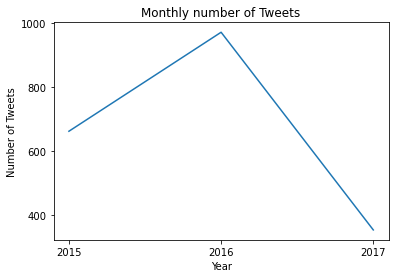

In [98]:
df['tweet_id'].groupby(df['timestamp'].dt.year).count().plot(kind ='line')
plt.title('Monthly number of Tweets')
plt.locator_params(nbins = 4)
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.savefig('number_of_tweets_with_respect_to_time');

### How people reacted towrads the campaign with respect to time

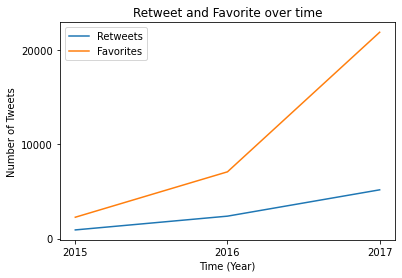

In [77]:
df.retweet_count.groupby(df['timestamp'].dt.year).mean().plot(kind ='line')
df.favorite_count.groupby(df['timestamp'].dt.year).mean().plot(kind ='line')
plt.locator_params(nbins = 4)
plt.title('Retweet and Favorite by year')
plt.ylabel('Number of Tweets')
plt.xlabel('Year')
plt.legend(('Retweets', 'Favorites'))
plt.savefig('people_interaction_time');

### Source distrbution 



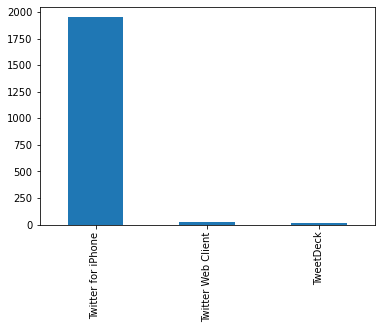

In [53]:
df['source'].value_counts().plot(kind='bar')


### Top 10 breeds

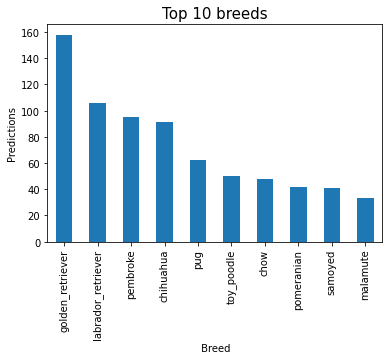

In [60]:
df['breed'][df['breed'] != "undefined"].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Predictions')
plt.title('Top 10 breeds', size=15)
plt.xlabel(' Breed')
plt.savefig('top_ten_breeds');

### Top 10 names

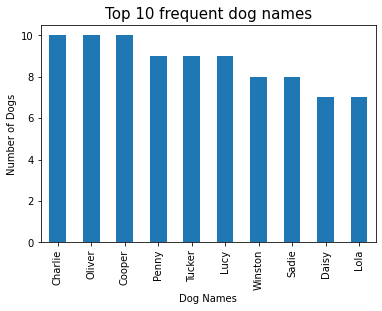

In [59]:
df['names'][df['names'] != "None"].value_counts()[0:10].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Number of Dogs')
plt.title('Top 10 frequent dog names', size=15)
plt.xlabel('Dog Names')
plt.savefig('most_frequent_names');

### How people rated dogs with respect to dog stage

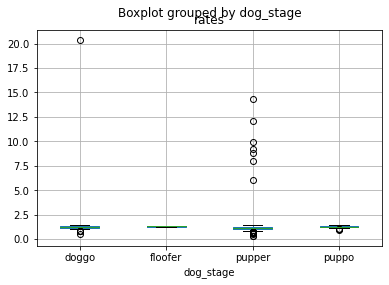

In [89]:
df.boxplot(column='rates', by='dog_stage');


In [84]:
df[df['breed'] != "undefined"].groupby('breed')['rates'].describe()


,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
afghan_hound,3.0,0.966667,0.577350,0.3,0.800,1.30,1.300,1.3
airedale,12.0,0.983333,0.224958,0.6,0.925,1.05,1.125,1.2
american_staffordshire_terrier,15.0,1.013333,0.309069,0.0,1.000,1.10,1.150,1.3
appenzeller,2.0,1.100000,0.282843,0.9,1.000,1.10,1.200,1.3
australian_terrier,2.0,1.150000,0.212132,1.0,1.075,1.15,1.225,1.3
...,...,...,...,...,...,...,...,...
welsh_springer_spaniel,4.0,0.950000,0.173205,0.8,0.800,0.95,1.100,1.1
west_highland_white_terrier,16.0,1.468750,1.853904,0.8,0.975,1.00,1.125,8.4
whippet,11.0,1.018182,0.183402,0.8,0.850,1.00,1.200,1.3
